# Yeezy Taught Me - Modeling, clustering, and similarity of audio features

# Project imports

In [91]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

Pretty charts:

In [92]:
plt.style.use('fivethirtyeight')

# Import data

In [93]:
song_features_df = pd.read_pickle('../data/processed/msd_subset_song_features_clean_df.pkl')

In [94]:
song_features_df.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,title,track_7digitalid,track_id,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums
0,22050,7725,0.687687,0.406686,ARDI88R1187B98DAB2,NaN,,NaN,fd87374e-ffde-4d36-89a8-8a073f795666,[],...,If I...,507029,TRACCSW128F148C7C3,0,0,346,86,10,934,692
1,22050,74269,0.593416,0.395710,ARZEWUR1187FB53DC8,50.45663,"Belgica -- Namur, Namur/Ghent, East Flanders",4.87137,0be59867-0da4-4e45-9b64-728cdf25487c,[],...,Ad Te Clamamus Exsvles Mortva Liberi,8688607,TRACCVS12903D014F8,2010,0,133,41,4,80,399
2,22050,49956,0.815923,0.555138,ARUZRFN1187B98AC05,NaN,"Cleveland, OH",NaN,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,[],...,Murder One,3510188,TRACCKS128F42B77AE,2000,0,426,426,11,1131,1277
3,22050,588,0.929030,0.750427,ARR3ONV1187B9A2F59,54.31407,UK,-2.23001,fd857293-5ab8-40de-b29e-55a69d4e4d0f,[],...,Bedroom Acoustics,5764770,TRACCUS128F92E1FEB,0,0,321,321,8,537,643
4,22050,11301,0.645192,0.471224,AR3THYK1187B999F1F,NaN,,NaN,286ec4c2-b5ca-4f85-b331-280a6d73dd14,"[brazilian, south american, brazilian classics...",...,Segredo,581259,TRACCJA128F149A144,2000,0,403,100,10,616,806


# Modeling

In [148]:
features = [
    'duration',
    'end_of_fade_in',
    'start_of_fade_out',
    'total_bars',
    'total_beats',
    'total_segments',
    'total_tatums',
    'tempo'
]

In [149]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=3)
X = song_features_df[features]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

# Save the identified cluster to our DataFrame
song_features_df['cluster'] = pd.Series(labels, index=song_features_df.index)

Counter({0: 2411, 1: 1904, 2: 295})


In [150]:
kanye_songs = song_features_df[song_features_df['is_kanye_song'] == 1]
kanye_songs.head(10)

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums,cluster,cosine_distance,kanye_similarity
318,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2008,1,396,131,7,648,792,0,"[1.0, 0.977133859007, 0.978977460852, 0.963454...",0.997487
324,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2005,1,318,79,9,1106,1274,1,"[0.977133859007, 1.0, 0.977607589599, 0.963618...",0.993439
620,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2005,1,608,149,12,1490,1215,1,"[0.978977460852, 0.977607589599, 1.0, 0.936645...",1.000000
1060,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2005,1,31,31,2,117,154,0,"[0.963454463237, 0.963618151383, 0.93664563512...",0.999972
1918,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2003,1,745,186,11,1209,1490,1,"[0.997486673277, 0.98190893458, 0.97889664522,...",1.000000
2643,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2003,1,154,30,3,209,154,0,"[0.862200828883, 0.799725659416, 0.84506272018...",0.878183
3222,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2010,1,432,105,12,1014,864,0,"[0.983787797031, 0.979220073667, 0.99956938565...",0.999569
3687,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2005,1,333,79,8,1033,999,1,"[0.981351619793, 0.99343864631, 0.993762060466...",1.000000
4289,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2005,1,30,30,2,116,154,0,"[0.962250462223, 0.963114531933, 0.93502709148...",0.999972


In [151]:
kanye_songs['title'].unique()

array(['Street Lights', "Heard 'Em Say", 'Gone',
       'Skit #2 (Kanye West/Late Registration)', 'Through The Wire',
       'School Spirit Skit 2', 'Touch The Sky',
       'Diamonds From Sierra Leone'], dtype=object)

In [152]:
kanye_clusters = sorted(kanye_songs['cluster'].unique())
print kanye_clusters

[0, 1]


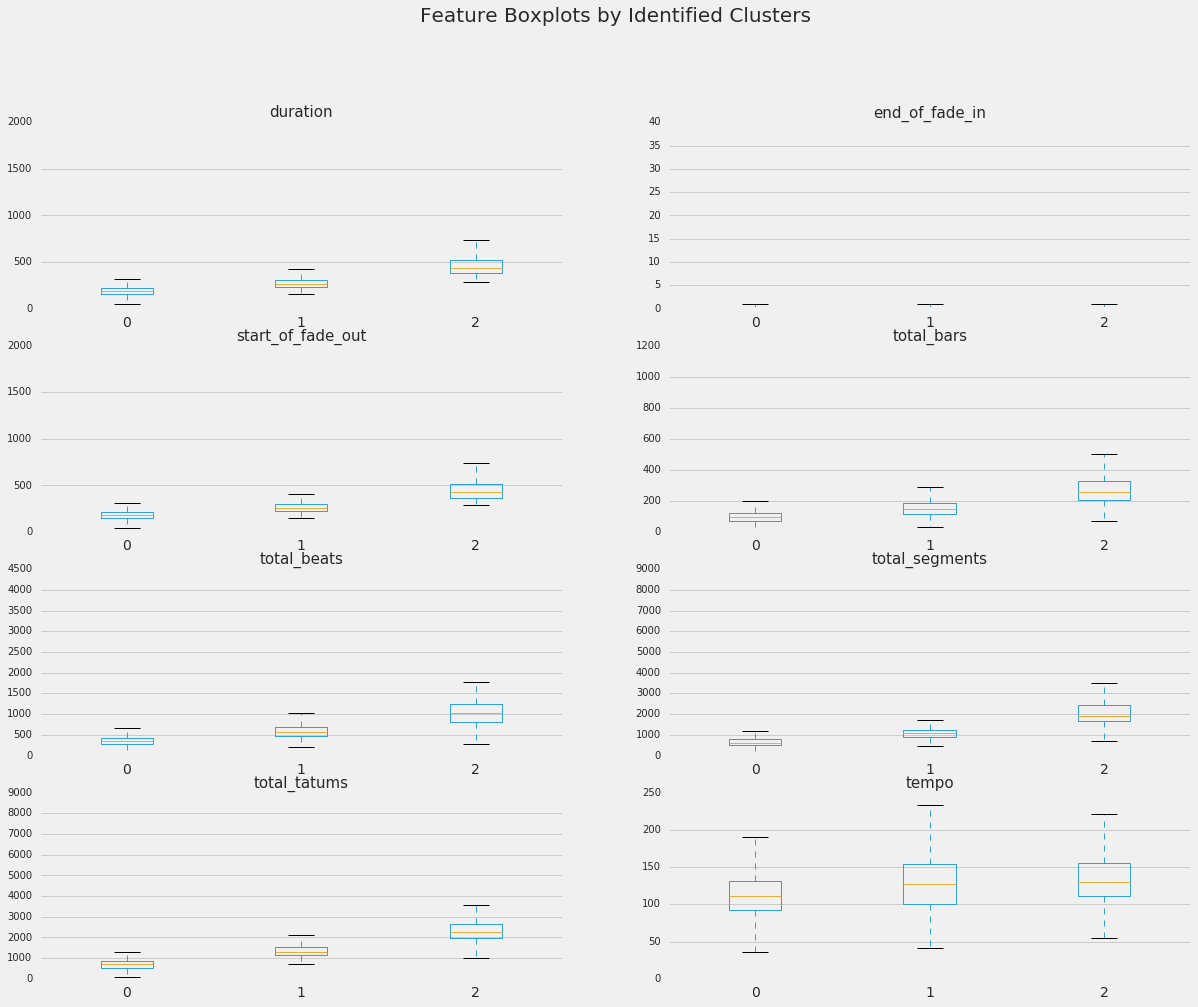

In [153]:
plt.figure(figsize=(20,20))

for i in range(len(features)):
    v = i +1
    ax1 = song_features_df.boxplot(features[i], by='cluster', ax=plt.subplot(5,2,v))
    ax1.set_title(str(features[i]), fontsize=15)
    ax1.set_xlabel('')
    ax1.xaxis.grid(False)
    ax1.yaxis.grid(True)
    
plt.suptitle('Feature Boxplots by Identified Clusters', size=20)

In [154]:
clusters = sorted(song_features_df['cluster'].unique())
for i in clusters:
    cluster_group = song_features_df[song_features_df['cluster'] == i]
    cluster_group = cluster_group[pd.notnull(cluster_group['artist_hotttnesss'])]
    cluster_group.sort_values(by='artist_hotttnesss', ascending=False, inplace=True)
    print 'Top 10 Songs (By Aritst Popularity) for Cluster %s' %i
    print
    print cluster_group[['artist_name', 'title', 'artist_hotttnesss']].head(10)
    print

Top 10 Songs (By Aritst Popularity) for Cluster 0

                                  artist_name  \
1060                               Kanye West   
2643                               Kanye West   
4289                               Kanye West   
318                                Kanye West   
3222                 Kanye West / Lupe Fiasco   
1276                          Black Eyed Peas   
540                           Black Eyed Peas   
1750  Black Eyed Peas / Les Nubians / Mos Def   
2080                                  Rihanna   
1150                                  Rihanna   

                                       title  artist_hotttnesss  
1060  Skit #2 (Kanye West/Late Registration)           1.082503  
2643                    School Spirit Skit 2           1.082503  
4289  Skit #2 (Kanye West/Late Registration)           1.082503  
318                            Street Lights           1.082503  
3222                           Touch The Sky           1.082503  
1276         

1. Use normalization
2. Compute the cosine
3. Find the max

In [155]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between our
# subset of Ye songs and the rest of our songs
# dataset
X = kanye_songs[features]
Y = song_features_df[features]
similarity = cosine_similarity(X, Y)

# Store the cosine distance results in our dataframe
song_features_df['cosine_distance'] = similarity.T.tolist()

In [156]:
# # A list of dictionaries containing the row index as the
# # key and the max cosine distance as the value
# kanye_similarity_index = list()

# for row in song_features_df.itertuples():
#     max_distance = 0
#     for idx, d in enumerate(row.cosine_distance):
#         if d != 1.0 and d > max_distance:
#             max_distance = d
#     kanye_similarity_index.append({ row.Index: max_distance })

In [157]:
def get_max_cosine_distance(distances):
    max_distance = 0.0
    for idx, d in enumerate(distances):
        if d != 1.0 and d > max_distance:
            max_distance = d
    return max_distance

In [158]:
song_features_df['kanye_similarity'] = song_features_df['cosine_distance'].apply(get_max_cosine_distance)

In [159]:
song_features_df.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums,cluster,cosine_distance,kanye_similarity
0,22050,7725,0.687687,0.406686,ARDI88R1187B98DAB2,NaN,,NaN,fd87374e-ffde-4d36-89a8-8a073f795666,[],...,0,0,346,86,10,934,692,0,"[0.970068365006, 0.969574050092, 0.99848643386...",0.998486
1,22050,74269,0.593416,0.395710,ARZEWUR1187FB53DC8,50.45663,"Belgica -- Namur, Namur/Ghent, East Flanders",4.87137,0be59867-0da4-4e45-9b64-728cdf25487c,[],...,2010,0,133,41,4,80,399,0,"[0.900446053971, 0.861852289996, 0.79966036836...",0.901572
2,22050,49956,0.815923,0.555138,ARUZRFN1187B98AC05,NaN,"Cleveland, OH",NaN,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,[],...,2000,0,426,426,11,1131,1277,1,"[0.983257131846, 0.980153309979, 0.97383144779...",0.983257
3,22050,588,0.929030,0.750427,ARR3ONV1187B9A2F59,54.31407,UK,-2.23001,fd857293-5ab8-40de-b29e-55a69d4e4d0f,[],...,0,0,321,321,8,537,643,0,"[0.976021756652, 0.939130861704, 0.94717766441...",0.976022
4,22050,11301,0.645192,0.471224,AR3THYK1187B999F1F,NaN,,NaN,286ec4c2-b5ca-4f85-b331-280a6d73dd14,"[brazilian, south american, brazilian classics...",...,2000,0,403,100,10,616,806,0,"[0.999139925488, 0.97515750271, 0.973118496509...",0.999140


In [160]:
song_features_df['kanye_similarity'].min()

0.65132022293981795

In [161]:
song_features_df['kanye_similarity'].max()

1.0000000000000004

In [162]:
top_matches = song_features_df.groupby(['artist_name'])['kanye_similarity'].apply(np.max)
top_matches = top_matches.sort_values(ascending=False)
top_matches.head(30)

artist_name
Kanye West                            1.000000
Kanye West / Consequence / Cam'Ron    1.000000
Mista                                 0.999987
Princess Lover                        0.999983
Mykill Miers                          0.999983
Michael McDonald                      0.999980
Brooke Valentine                      0.999976
Dub Pistols feat. TK & JMS            0.999976
DJ Quik                               0.999974
The Winans                            0.999970
themselves                            0.999962
Leroy Hutson                          0.999961
Tha Chamba                            0.999960
Rakim feat. Tracey Horton             0.999956
Pete Philly & Perquisite              0.999954
OutKast                               0.999945
The Shamen                            0.999945
Eric Champion                         0.999941
Toni Braxton                          0.999940
Twista                                0.999937
Eminem                                0.999934
L

In [163]:
clean_years = song_features_df[song_features_df['year'] >= 2001]

In [164]:
top_matches = clean_years.groupby(['artist_name'])['kanye_similarity'].apply(np.max)
top_matches = top_matches.sort_values(ascending=False)
top_matches.head(50)

artist_name
Kanye West                                                     1.000000
Kanye West / Consequence / Cam'Ron                             1.000000
Princess Lover                                                 0.999983
Brooke Valentine                                               0.999976
themselves                                                     0.999962
Rakim feat. Tracey Horton                                      0.999956
Twista                                                         0.999937
Aesop Rock                                                     0.999910
Sub Focus                                                      0.999909
Eddie                                                          0.999890
Deftones                                                       0.999885
Kirk Franklin                                                  0.999883
The Killers                                                    0.999878
Jay-Z                                               